**1.What is a Support Vector Machine (SVM)?**
A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and sometimes regression tasks

**2. What is the difference between Hard Margin and Soft Margin SVM?**
Hard Margin SVM requires perfect separation with no misclassifications, while Soft Margin SVM allows some misclassifications to achieve better generalization on noisy data.

**3.What is the mathematical intuition behind SVM?**
Find the best separating hyperplane that not only classifies data correctly but also maximizes the margin (the gap between the two classes).

**4. What is the role of Lagrange Multipliers in SVM?**
Lagrange multipliers (denoted by 𝛼) allow us to convert a constrained optimization problem into an unconstrained one, so it can be solved more easily using calculus.

**5.What are Support Vectors in SVM?**
Support Vectors are the data points that lie closest to the decision boundary (hyperplane) — they are the critical elements of the dataset that define the position and orientation of that hyperplane.

**6.What is a Support Vector Classifier (SVC)?**
A Support Vector Classifier (SVC) is the practical implementation of the Support Vector Machine (SVM) algorithm specifically for categorical data.

**7.What is a Support Vector Regressor (SVR)?**
A Support Vector Regressor (SVR) is a type of Support Vector Machine (SVM) that is used for regression tasks instead of classification.

**8.What is the Kernel Trick in SVM?**
The Kernel Trick lets SVMs find linear boundaries in high-dimensional feature spaces without explicitly transforming the data — by computing inner products using a kernel function instead.

**9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel?**
Linear Kernel works for linearly separable data, Polynomial Kernel captures curved but polynomial relationships, and RBF Kernel handles highly non-linear, complex boundaries using distance-based similarity.

**10.What is the effect of the C parameter in SVM?**
The C parameter controls the trade-off between maximizing the margin and minimizing classification errors.

**11. What is the role of the Gamma parameter in RBF Kernel SVM?**
The Gamma  parameter controls how far the influence of a single training point reaches. low gama represent high reach and high gama represent close reach.

**12. What is the Naïve Bayes classifier, and why is it called "Naïve**?
Naïve Bayes is a probabilistic classifier based on Bayes’ theorem that assumes feature independence — it’s called “naïve” because this assumption is rarely true but makes the model simple and effective..

**13.What is Bayes’ Theorem?**
Bayes’ Theorem gives a way to update the probability of a hypothesis based on new evidence using the formula

P(A/B) = P(B/A)*P(A)\P(B)

**14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes?**
Gaussian Naïve Bayes handles continuous features assuming a normal distribution, Multinomial Naïve Bayes works with count-based features like word frequencies, and Bernoulli Naïve Bayes deals with binary features indicating presence or absence.

**15.  When should you use Gaussian Naïve Bayes over other variants?**
ChatGPT said:

Use Gaussian Naïve Bayes when your features are continuous and approximately follow a normal (bell-curve) distribution, such as measurements like height, weight, or temperature.

**16. What are the key assumptions made by Naïve Bayes?**
The key assumptions of Naïve Bayes are:

Feature Independence: All features are conditionally independent given the class label.

Equal Importance: Each feature contributes equally to the outcome.

Correct Distributional Form: The feature values follow the assumed distribution (e.g., Gaussian for continuous data, multinomial or Bernoulli for discrete data).

**17.What are the advantages and disadvantages of Naïve Bayes?**
Naïve Bayes is fast and effective for simple, high-dimensional problems but struggles when feature independence doesn’t hold.

**18. Why is Naïve Bayes a good choice for text classification?**
Naïve Bayes works great for text classification because it efficiently handles large, sparse, and nearly independent word features.

**19. Compare SVM and Naïve Bayes for classification tasks?**
SVM focuses on finding the best separating boundary, while Naïve Bayes relies on probability and independence assumptions for fast, simple classification.

**20.How does Laplace Smoothing help in Naïve Bayes?**

Laplace smoothing prevents zero probabilities in Naïve Bayes by adding a small constant to all counts, ensuring every feature has a nonzero likelihood.


In [2]:
'''21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy'''

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


iris = datasets.load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


svm_clf = SVC()
svm_clf.fit(X_train, y_train)


y_pred = svm_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("SVM Classifier Accuracy:", round(accuracy * 100, 2), "%")


SVM Classifier Accuracy: 100.0 %


In [4]:
'''23. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then
compare their accuracies'''


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


wine = datasets.load_wine()
X = wine.data
y = wine.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')


svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)


y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)


acc_linear = accuracy_score(y_test, y_pred_linear)
acc_rbf = accuracy_score(y_test, y_pred_rbf)


print("SVM (Linear Kernel) Accuracy:", round(acc_linear * 100, 2), "%")
print("SVM (RBF Kernel) Accuracy:", round(acc_rbf * 100, 2), "%")


if acc_linear > acc_rbf:
    print("\n Linear Kernel performed better.")
elif acc_rbf > acc_linear:
    print("\n RBF Kernel performed better.")
else:
    print("\n Both kernels performed equally well.")



SVM (Linear Kernel) Accuracy: 97.22 %
SVM (RBF Kernel) Accuracy: 100.0 %

 RBF Kernel performed better.


In [6]:
'''23.  Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean
Squared Error (MSE)'''


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


data = fetch_california_housing()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


svr_model = SVR()
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate model performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("SVR Mean Squared Error (MSE):", round(mse, 4))


SVR Mean Squared Error (MSE): 0.357


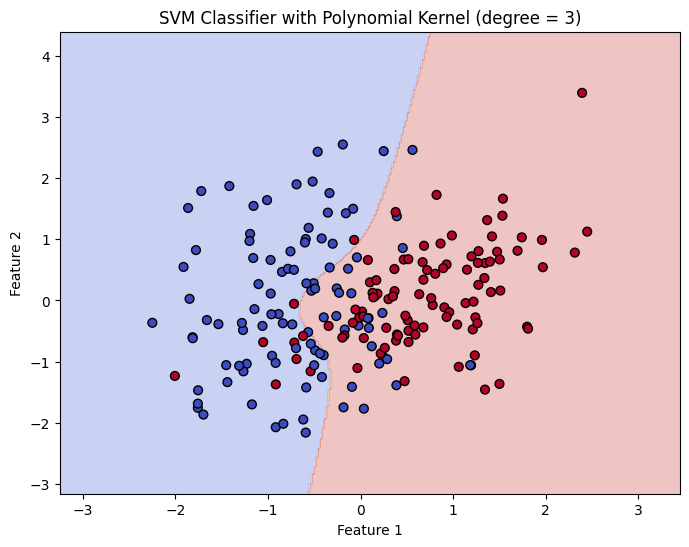

In [7]:
'''24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision
boundary'''


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42
)


scaler = StandardScaler()
X = scaler.fit_transform(X)


svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_poly.fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))


Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("SVM Classifier with Polynomial Kernel (degree = 3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [8]:
'''25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and
evaluate accuracy'''


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


data = load_breast_cancer()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


gnb = GaussianNB()
gnb.fit(X_train, y_train)


y_pred = gnb.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Gaussian Naïve Bayes Classifier Accuracy:", round(accuracy * 100, 2), "%")


Gaussian Naïve Bayes Classifier Accuracy: 96.49 %


In [9]:
'''26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20
Newsgroups dataset.'''


from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


categories = ['rec.sport.baseball', 'rec.sport.hockey', 'sci.space', 'comp.graphics']
data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))


X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)


vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


nb = MultinomialNB()
nb.fit(X_train_counts, y_train)


y_pred = nb.predict(X_test_counts)


accuracy = accuracy_score(y_test, y_pred)
print("Multinomial Naïve Bayes Classifier Accuracy:", round(accuracy * 100, 2), "%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Multinomial Naïve Bayes Classifier Accuracy: 88.24 %

Classification Report:
                    precision    recall  f1-score   support

     comp.graphics       0.87      0.89      0.88       188
rec.sport.baseball       0.77      0.91      0.84       185
  rec.sport.hockey       0.95      0.86      0.91       222
         sci.space       0.94      0.88      0.91       196

          accuracy                           0.88       791
         macro avg       0.89      0.88      0.88       791
      weighted avg       0.89      0.88      0.88       791



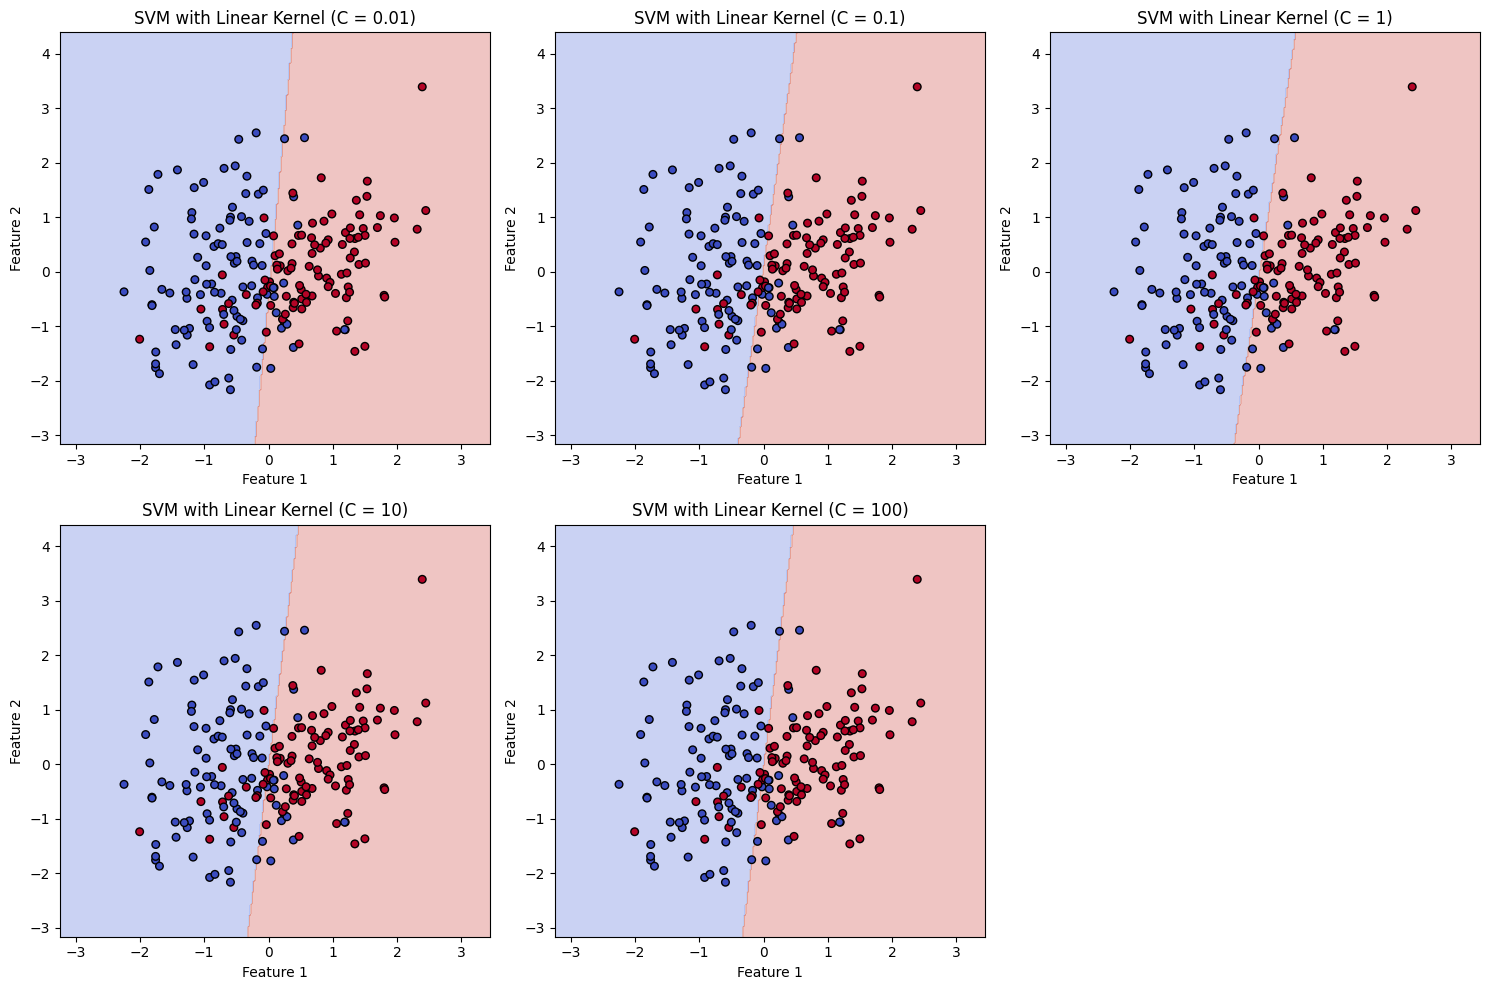

In [10]:
'''27.Write a Python program to train an SVM Classifier with different C values and compare the decision
boundaries visually'''


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42
)


scaler = StandardScaler()
X = scaler.fit_transform(X)


C_values = [0.01, 0.1, 1, 10, 100]


plt.figure(figsize=(15, 10))


for i, C in enumerate(C_values, 1):
    # Create and train SVM classifier
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)


    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))


    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.subplot(2, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(f"SVM with Linear Kernel (C = {C})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")


plt.tight_layout()
plt.show()


In [11]:
'''28.Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with
binary features'''

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report


np.random.seed(42)
X = np.random.randint(2, size=(200, 10))
y = np.random.randint(2, size=200)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


bnb = BernoulliNB()
bnb.fit(X_train, y_train)


y_pred = bnb.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Bernoulli Naïve Bayes Classifier Accuracy:", round(accuracy * 100, 2), "%")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Bernoulli Naïve Bayes Classifier Accuracy: 65.0 %

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        22
           1       0.61      0.61      0.61        18

    accuracy                           0.65        40
   macro avg       0.65      0.65      0.65        40
weighted avg       0.65      0.65      0.65        40



In [12]:
'''29.Write a Python program to apply feature scaling before training an SVM model and compare results with
unscaled data'''

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = datasets.load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_unscaled = SVC(kernel='rbf', C=1)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='rbf', C=1)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print("Accuracy without Scaling:", round(acc_unscaled * 100, 2), "%")
print("Accuracy with Scaling:", round(acc_scaled * 100, 2), "%")


Accuracy without Scaling: 75.93 %
Accuracy with Scaling: 98.15 %


In [13]:
'''30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and
after Laplace Smoothing?'''

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb_no_smoothing = GaussianNB(var_smoothing=1e-9)
gnb_no_smoothing.fit(X_train, y_train)
y_pred_no_smoothing = gnb_no_smoothing.predict(X_test)
acc_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)

gnb_with_smoothing = GaussianNB(var_smoothing=1e-2)
gnb_with_smoothing.fit(X_train, y_train)
y_pred_with_smoothing = gnb_with_smoothing.predict(X_test)
acc_with_smoothing = accuracy_score(y_test, y_pred_with_smoothing)

print("Accuracy without Laplace Smoothing:", round(acc_no_smoothing * 100, 2), "%")
print("Accuracy with Laplace Smoothing:", round(acc_with_smoothing * 100, 2), "%")
print("\nPredictions without smoothing:\n", y_pred_no_smoothing)
print("\nPredictions with smoothing:\n", y_pred_with_smoothing)


Accuracy without Laplace Smoothing: 97.78 %
Accuracy with Laplace Smoothing: 100.0 %

Predictions without smoothing:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]

Predictions with smoothing:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [14]:
'''31.  Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,
gamma, kernel)'''

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", round(grid.best_score_ * 100, 2), "%")
print("Test Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")


Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best Cross-Validation Score: 96.19 %
Test Accuracy: 100.0 %


In [15]:
'''32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and
check it improve accuracy?'''

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=2, weights=[0.9, 0.1], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_no_weight = SVC(kernel='rbf', C=1, random_state=42)
svm_no_weight.fit(X_train, y_train)
y_pred_no_weight = svm_no_weight.predict(X_test)
acc_no_weight = accuracy_score(y_test, y_pred_no_weight)

svm_weighted = SVC(kernel='rbf', C=1, class_weight='balanced', random_state=42)
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)
acc_weighted = accuracy_score(y_test, y_pred_weighted)

print("Accuracy without class weighting:", round(acc_no_weight * 100, 2), "%")
print("Accuracy with class weighting:", round(acc_weighted * 100, 2), "%")
print("\nClassification Report (with class weighting):\n", classification_report(y_test, y_pred_weighted))


Accuracy without class weighting: 94.33 %
Accuracy with class weighting: 93.33 %

Classification Report (with class weighting):
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       268
           1       0.64      0.88      0.74        32

    accuracy                           0.93       300
   macro avg       0.81      0.91      0.85       300
weighted avg       0.95      0.93      0.94       300



In [16]:
'''33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data'''
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

data['label'] = data['label'].map({'ham': 0, 'spam': 1})

X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=42)

vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

y_pred = nb.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)

print("Naïve Bayes Spam Detection Accuracy:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


Naïve Bayes Spam Detection Accuracy: 98.74 %

Classification Report:
               precision    recall  f1-score   support

         Ham       0.99      0.99      0.99      1448
        Spam       0.96      0.95      0.95       224

    accuracy                           0.99      1672
   macro avg       0.97      0.97      0.97      1672
weighted avg       0.99      0.99      0.99      1672



In [17]:
'''Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and
compare their accuracy'''

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = datasets.load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

print("SVM Classifier Accuracy:", round(acc_svm * 100, 2), "%")
print("Naïve Bayes Classifier Accuracy:", round(acc_nb * 100, 2), "%")


SVM Classifier Accuracy: 98.15 %
Naïve Bayes Classifier Accuracy: 100.0 %


In [18]:
'''35.Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare
results'''
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb_all = GaussianNB()
nb_all.fit(X_train, y_train)
y_pred_all = nb_all.predict(X_test)
acc_all = accuracy_score(y_test, y_pred_all)

selector = SelectKBest(score_func=f_classif, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

nb_selected = GaussianNB()
nb_selected.fit(X_train_selected, y_train)
y_pred_selected = nb_selected.predict(X_test_selected)
acc_selected = accuracy_score(y_test, y_pred_selected)

print("Naïve Bayes Accuracy with All Features:", round(acc_all * 100, 2), "%")
print("Naïve Bayes Accuracy with Selected Features:", round(acc_selected * 100, 2), "%")


Naïve Bayes Accuracy with All Features: 97.78 %
Naïve Bayes Accuracy with Selected Features: 100.0 %


In [19]:
'''36.Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO)
strategies on the Wine dataset and compare their accuracy'''

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

X, y = datasets.load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ovr = OneVsRestClassifier(SVC(kernel='rbf', C=1, gamma='scale'))
ovr.fit(X_train_scaled, y_train)
y_pred_ovr = ovr.predict(X_test_scaled)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

ovo = OneVsOneClassifier(SVC(kernel='rbf', C=1, gamma='scale'))
ovo.fit(X_train_scaled, y_train)
y_pred_ovo = ovo.predict(X_test_scaled)
acc_ovo = accuracy_score(y_test, y_pred_ovo)

print("One-vs-Rest (OvR) SVM Accuracy:", round(acc_ovr * 100, 2), "%")
print("One-vs-One (OvO) SVM Accuracy:", round(acc_ovo * 100, 2), "%")


One-vs-Rest (OvR) SVM Accuracy: 98.15 %
One-vs-One (OvO) SVM Accuracy: 98.15 %


In [20]:
'''37.Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast
Cancer dataset and compare their accuracy'''

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, y_train)
acc_linear = accuracy_score(y_test, svm_linear.predict(X_test_scaled))

svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(X_train_scaled, y_train)
acc_poly = accuracy_score(y_test, svm_poly.predict(X_test_scaled))

svm_rbf = SVC(kernel='rbf', C=1)
svm_rbf.fit(X_train_scaled, y_train)
acc_rbf = accuracy_score(y_test, svm_rbf.predict(X_test_scaled))

print("Linear Kernel Accuracy:", round(acc_linear * 100, 2), "%")
print("Polynomial Kernel Accuracy:", round(acc_poly * 100, 2), "%")
print("RBF Kernel Accuracy:", round(acc_rbf * 100, 2), "%")


Linear Kernel Accuracy: 97.66 %
Polynomial Kernel Accuracy: 89.47 %
RBF Kernel Accuracy: 97.66 %


In [21]:
'''38.Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the
average accuracy'''

from sklearn import datasets
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np

X, y = datasets.load_wine(return_X_y=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm = SVC(kernel='rbf', C=1, gamma='scale')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm, X_scaled, y, cv=skf, scoring='accuracy')

print("Accuracy for each fold:", np.round(scores * 100, 2))
print("Average Accuracy:", round(np.mean(scores) * 100, 2), "%")


Accuracy for each fold: [ 94.44 100.    97.22 100.   100.  ]
Average Accuracy: 98.33 %


In [22]:
'''39.Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare
performance'''

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb_default = GaussianNB()
nb_default.fit(X_train, y_train)
y_pred_default = nb_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)

nb_custom = GaussianNB(priors=[0.2, 0.5, 0.3])
nb_custom.fit(X_train, y_train)
y_pred_custom = nb_custom.predict(X_test)
acc_custom = accuracy_score(y_test, y_pred_custom)

print("Accuracy with Default Priors:", round(acc_default * 100, 2), "%")
print("Accuracy with Custom Priors [0.2, 0.5, 0.3]:", round(acc_custom * 100, 2), "%")


Accuracy with Default Priors: 97.78 %
Accuracy with Custom Priors [0.2, 0.5, 0.3]: 100.0 %


In [23]:
'''40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and
compare accuracy'''

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

X, y = datasets.load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_base = SVC(kernel='linear', C=1)
svm_base.fit(X_train_scaled, y_train)
y_pred_base = svm_base.predict(X_test_scaled)
acc_base = accuracy_score(y_test, y_pred_base)

rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

svm_rfe = SVC(kernel='linear', C=1)
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, y_pred_rfe)

print("SVM Accuracy without RFE:", round(acc_base * 100, 2), "%")
print("SVM Accuracy with RFE:", round(acc_rfe * 100, 2), "%")


SVM Accuracy without RFE: 98.15 %
SVM Accuracy with RFE: 98.15 %


In [27]:
'''41.Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and
F1-Score instead of accuracy'''

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("F1-Score:", round(f1, 2))
print("\nDetailed Classification Report:\n", classification_report(y_test,y_pred))

Precision: 0.98
Recall: 0.98
F1-Score: 0.98

Detailed Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [28]:
''' 42.  Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss
(Cross-Entropy Loss)'''

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_prob = nb.predict_proba(X_test)

loss = log_loss(y_test, y_prob)

print("Naïve Bayes Log Loss (Cross-Entropy Loss):", round(loss, 4))


Naïve Bayes Log Loss (Cross-Entropy Loss): 0.049


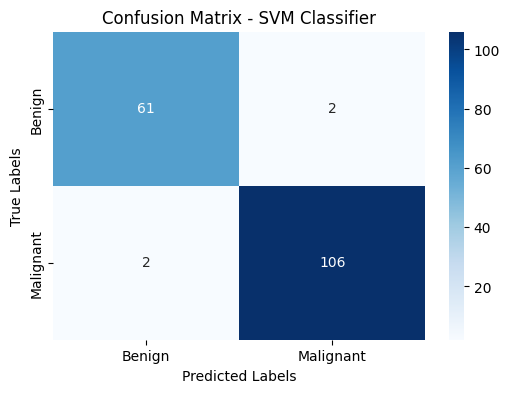

In [30]:
'''43.Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn'''

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix - SVM Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [31]:
'''44.Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute
Error (MAE) instead of MSE'''

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=100, gamma=0.1)
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 3))


Mean Absolute Error (MAE): 0.373


Naïve Bayes ROC-AUC Score: 0.992


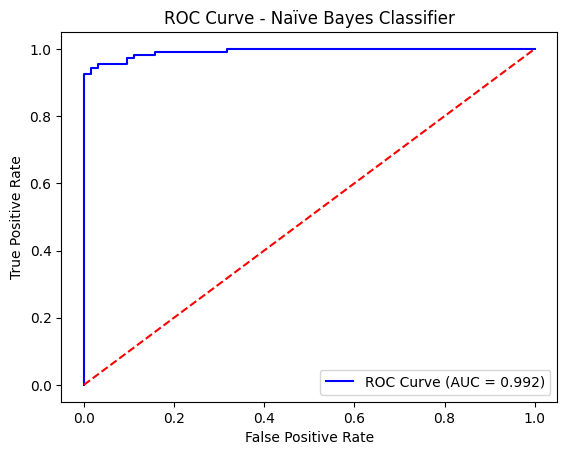

In [33]:
'''45.Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC
score'''
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_prob = nb.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
print("Naïve Bayes ROC-AUC Score:", round(roc_auc, 3))

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("ROC Curve - Naïve Bayes Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


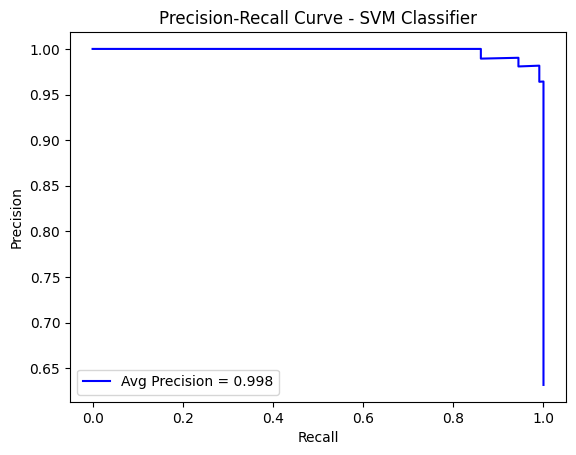

In [34]:
'''46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve'''
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svm.fit(X_train_scaled, y_train)
y_prob = svm.predict_proba(X_test_scaled)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, color='blue', label=f'Avg Precision = {avg_precision:.3f}')
plt.title("Precision-Recall Curve - SVM Classifier")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()
